In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# VASP - Equation of State (EOS)
## Running strucscan
In this example, we want to introduce how to perform VASP calcultions using strucscan and perfom a Murnaghan equation of state calculation in fcc Al. This examples requires the two prerequisites:
* a licensed VASP version
* a configured resource directory including the neccessary POTCAR for Al

In the documentation it is explained how to set up the resource directory for VASP. We will also need a settings template. For this, you can stick to the default one that comes with the repository. We will perform a spin-polarised calculation with an energy cut-off of 500 eV:

In [2]:
! cat ../resources/engines/vasp/settings/500_SP.incar

! ISIF and IBRION flags will be set automatically by strucscan
ALGO            = Fast
PREC            = Accurate
EDIFF           = 1e-05
NSW             = 100
NELM            = 60
LREAL           = .FALSE.
LWAVE           = .FALSE.
ISPIN           = 2
LCHARG          = .FALSE.
LORBIT          = 11
ENCUT           = 500


## The structure
For our calculation, we will use a 1-atom ideal fcc structure:

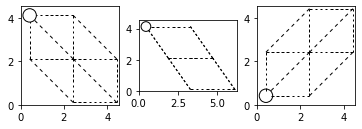

In [3]:
from ase.visualize.plot import plot_atoms
from ase import io

structname = "../structures/unaries/bulk/fcc.cfg"
atoms = io.read(structname, format="cfg")

fig, axs = plt.subplots(1, 3, figsize=(6,7))
for ind, rotation in enumerate(['90x,90y', '90x,45y', '0x']):
    plot_atoms(atoms, rotation=(rotation), ax=axs[ind])
plt.show()

## The `input` dictionary
As a next step we need to define our input dicitionary. Let's start from scratch with the mandatory keys needed for VASP:

In [4]:
from strucscan.resources.inputyaml import * 
VASP().MANDATORY

{'species': 'str',
 'engine': 'str',
 'machine': 'str',
 'ncores': 'str',
 'nnodes': 'str',
 'queuename': 'str',
 'potential': 'str',
 'properties': 'str',
 'prototypes': 'str',
 'settings': 'str',
 'magnetic configuration': 'str',
 'initial magnetic moments': 'str'}

We need to set each value by ourself. We will set the `verbose` tag to `True` in order to have some more insight.

In [5]:
input_dict = {'species': 'Al',
              'engine': 'VASP 5.4',
              'machine': 'example_vasp',
              'ncores': '1',
              'nnodes': '1',
              'queuename': 'none',
              'potential': 'PBE',
              'properties': 'EOS',
              'prototypes': 'fcc.cfg',
              'settings': '500_SP.incar',
              'magnetic configuration': 'SP',
              'initial magnetic moments': '2.0',
              'verbose': True
             }

## Running strucscan
We are now ready to run strucscan. Let's hand over our input to it:

In [ ]:
from strucscan.core.jobmanager import JobManager

JobManager(input_dict)

Data tree path:                /home/users/pietki8q/git/Strucscan/data
Structure repository:          /home/users/pietki8q/git/Strucscan/structures
Resource repository:           /home/users/pietki8q/git/Strucscan/resources

Optional key 'initial atvolume' not provided. Default value will be used: default
Optional key 'monitor' not provided. Default value will be used: True
Optional key 'submit' not provided. Default value will be used: True
Optional key 'collect' not provided. Default value will be used: True
Optional key 'kdens' not provided. Default value will be used: 0.15
Optional key 'kmesh' not provided. Default value will be used: Monkhorst-pack
Optional key 'k points file' not provided. Default value will be used: (None)


key:                           : your input                                         what strucscan reads                              
----------------------------------------------------------------------------------------------------
species               

In [ ]:
import json

with open("../../VASP_5_4__500_kdens_0_150_SP_PBE__Al__output_dict.yaml") as stream:
    output_dict = json.load(stream)
    stream.close()

plt.plot(output_dict["EOS_atomic__fcc__Al"]["volume"]['__ndarray__'][2], 
         output_dict["EOS_atomic__fcc__Al"]["energy"]['__ndarray__'][2])
plt.xlabel("Volume / $\AA$")
plt.ylabel("Energy / $eV$")
plt.show()